In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.regularizers import l2
from keras import optimizers
from keras.utils import to_categorical

In [ ]:
talent_list = [
    {
        "name": "アンジュ・カトリーナ",
        "path": "/content/drive/MyDrive/DataScience/chat-ange.npy",
        "color": "#C83C35",
    },
    {
        "name": "リゼ・ヘルエスタ",
        "path": "/content/drive/MyDrive/DataScience/chat-lize.npy",
        "color": "#42FFFF",
    },
    {
        "name": "戌亥とこ",
        "path": "/content/drive/MyDrive/DataScience/chat-toko.npy",
        "color": "#92F3A4",
    }
]

In [ ]:
X = np.empty((0, 128, 173))
Y = np.empty((0, ))

for index, d in enumerate(talent_list):
    name = d["name"]
    path = d["path"]
    x_data = np.load(path)
    print(f"{name}'s data: {x_data.shape}")
    y_data = np.full((x_data.shape[0], ), index)

    X = np.concatenate((X, x_data), axis = 0)
    Y = np.concatenate((Y, y_data), axis = 0)

_, n_mels, n_time = X.shape

# Reshape X for CNN input and convert Y to categorical for binary classification
X = X[..., np.newaxis]
# Assuming classes are 0, 1, 2
Y = to_categorical(Y, num_classes=len(talent_list))  # Convert Y to categorical for multi-class classification

アンジュ・カトリーナ's data: (692, 128, 173)
リゼ・ヘルエスタ's data: (631, 128, 173)
戌亥とこ's data: (699, 128, 173)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 173, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 173, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 128, 173, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 173, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 173, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 128, 173, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 42, 57, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 42, 57, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 42, 57, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 42, 57, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 42, 57, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 42, 57, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 42, 57, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 42, 57, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 19, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 19, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 14, 19, 256)         │         819,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 19, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 14, 19, 256)         │              

 Total params: 1,475,267 (5.63 MB)

 Trainable params: 1,473,987 (5.62 MB)

 Non-trainable params: 1,280 (5.00 KB)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 32s 514ms/step - acc: 0.3460 - loss: 2.3242 - val_acc: 0.3284 - val_loss: 2.3351
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 14s 117ms/step - acc: 0.4848 - loss: 1.6034 - val_acc: 0.3284 - val_loss: 2.0161
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - acc: 0.6343 - loss: 1.4233 - val_acc: 0.3358 - val_loss: 1.8176
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - acc: 0.6940 - loss: 1.3336 - val_acc: 0.4617 - val_loss: 1.5308
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - acc: 0.7286 - loss: 1.2766 - val_acc: 0.4321 - val_loss: 1.5730
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - acc: 0.8045 - loss: 1.2113 - val_acc: 0.6049 - val_loss: 1.3078
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - acc: 0.8161 - loss: 1.1828 - val_acc: 0.6519 - val_loss: 1.2741
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - acc: 0.8267 - loss: 1.1619 - val_acc: 0.7778 - val_loss: 1.1536
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 4s 133m

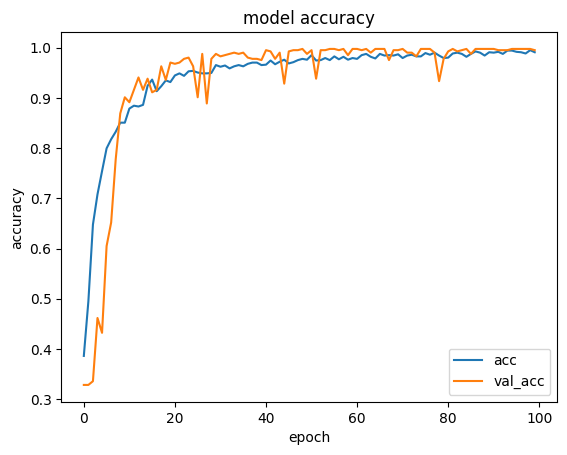

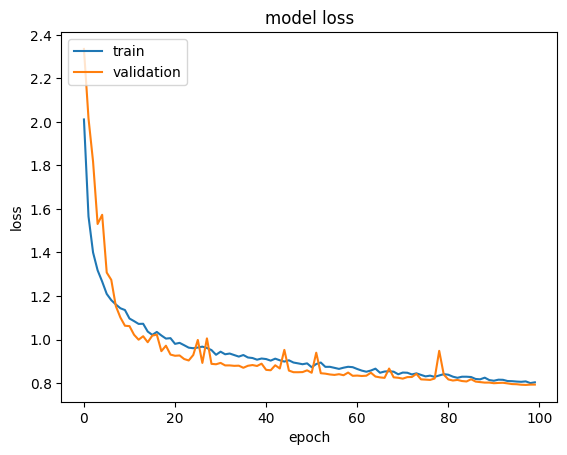

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

# モデル構築
model = Sequential()

# 第1ブロック
model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.001), input_shape=(n_mels, n_time, 1)))
model.add(BatchNormalization())  # バッチ正規化
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.3))  # ドロップアウト

# 第2ブロック
model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.3))  # ドロップアウト

# 第3ブロック
model.add(Conv2D(256, (5, 5), padding='same', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(5, 5)))
model.add(Dropout(0.4))  # ドロップアウト

# 全結合層
model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))  # ドロップアウト
model.add(Dense(len(talent_list), activation='softmax'))

# コンパイル
sgd=optimizers.SGD(
    learning_rate=0.01,
    momentum=0.0,
    weight_decay=0.0,
    nesterov=False
    )
model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['acc'])
model.summary()

history = model.fit(X_train, y_train, batch_size=40, epochs=100,
                   validation_data=(X_val, y_val), verbose = 1)
#acc
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
model.save("/content/drive/MyDrive/DataScience/cnn-sanbaka-norm.keras")

In [ ]:
predictions = model.predict(X_test)
predicted_indexs = np.argmax(predictions, axis=1)

accuracy_score = 0

for idx in range(len(predictions)):
  predicted_index = predicted_indexs[idx]
  predicted_name = talent_list[predicted_index]["name"]

  y_test_one_hot = y_test[idx]
  y_index = np.argmax(y_test_one_hot, axis=0)
  y_name = talent_list[y_index]["name"]

  correctness = (y_name == predicted_name)

  print(f"Predicted Name: {predicted_name}, Answer Name: {y_name}, Correctness: {correctness}")

  if correctness:
    accuracy_score += 1

print(f"Acuracy: {accuracy_score / len(predictions)}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step
Predicted Name: リゼ・ヘルエスタ, Answer Name: リゼ・ヘルエスタ, Correctness: True
Predicted Name: 戌亥とこ, Answer Name: 戌亥とこ, Correctness: True
Predicted Name: アンジュ・カトリーナ, Answer Name: アンジュ・カトリーナ, Correctness: True
Predicted Name: リゼ・ヘルエスタ, Answer Name: リゼ・ヘルエスタ, Correctness: True
Predicted Name: リゼ・ヘルエスタ, Answer Name: リゼ・ヘルエスタ, Correctness: True
Predicted Name: リゼ・ヘルエスタ, Answer Name: リゼ・ヘルエスタ, Correctness: True
Predicted Name: 戌亥とこ, Answer Name: 戌亥とこ, Correctness: True
Predicted Name: 戌亥とこ, Answer Name: 戌亥とこ, Correctness: True
Predicted Name: リゼ・ヘルエスタ, Answer Name: リゼ・ヘルエスタ, Correctness: True
Predicted Name: 戌亥とこ, Answer Name: 戌亥とこ, Correctness: True
Predicted Name: アンジュ・カトリーナ, Answer Name: アンジュ・カトリーナ, Correctness: True
Predicted Name: アンジュ・カトリーナ, Answer Name: アンジュ・カトリーナ, Correctness: True
Predicted Name: リゼ・ヘルエスタ, Answer Name: リゼ・ヘルエスタ, Correctness: True
Predicted Name: 戌亥とこ, Answer Name: 戌亥とこ, Correctness: True
Predicted Name: リゼ・ヘルエスタ, Answer Name: リゼ・ヘルエスタ, 

In [ ]:
from sklearn.metrics import confusion_matrix

#Create confusion matrix and normalizes it over predicted (columns)

y_test_indexes = np.argmax(y_test, axis=1)
predicted_indexes = np.argmax(predictions, axis=1)

result = confusion_matrix(y_test_indexes, predicted_indexes , normalize='pred')

In [ ]:
result

array([[0.99310345, 0.        , 0.00689655],
       [0.        , 1.        , 0.00689655],
       [0.00689655, 0.        , 0.9862069 ]])